In [ ]:
# Small Input 1:
num_vehicles = 2
num_customers = 2
depot = 0
locations = np.random.randint(1, 8, size=(num_customers, 2))

# Small Input 2:
num_vehicles = 2
num_customers = 3
depot = 0
locations = np.random.randint(1, 8, size=(num_customers, 2))

# Small Input 3:
num_vehicles = 2
num_customers = 4
depot = 0
locations = np.random.randint(1, 8, size=(num_customers, 2))

# Medium Input 1:
num_vehicles = 3
num_customers = 7
depot = 0
locations = np.random.randint(1, 10, size=(num_customers, 2))

# Medium Input 2:
num_vehicles = 4
num_customers = 10
depot = 0
locations = np.random.randint(1, 10, size=(num_customers, 2))

# Medium Input 3:
num_vehicles = 4
num_customers = 6
depot = 0
locations = np.random.randint(1, 10, size=(num_customers, 2))

# Big Input 1:
num_vehicles = 10
num_customers = 20
depot = 0
locations = np.random.randint(1, 100, size=(num_customers, 2))

# Big Input 2:
num_vehicles = 10
num_customers = 30
depot = 0
locations = np.random.randint(1, 100, size=(num_customers, 2))

# Big Input 3:
num_vehicles = 20
num_customers = 50
depot = 0
locations = np.random.randint(1, 100, size=(num_customers, 2))

In [ ]:
pip install pygad==2.16.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: pygad
    Found existing installation: pygad 2.19.2
    Uninstalling pygad-2.19.2:
      Successfully uninstalled pygad-2.19.2


In [ ]:
pip install pyswarms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


VRP - Vehicle Routing Problem. The problem involves finding the optimal routes for a set of vehicles to visit a number of customers, while minimizing the total distance traveled by the vehicles.

In [ ]:
import matplotlib.pyplot as plt
import pygad
import numpy as np

#These variables represent the number of vehicles, the number of customers, and the index of the depot, respectively. 
#These values are used to generate the initial population of solutions and to calculate the fitness function.
num_vehicles = 10
num_customers = 20
depot = 0

#  This line generates a 2D array of random integers between 1 and 8(in this case), representing the x and y coordinates of the customers' locations.
locations = np.random.randint(1, 100, size=(num_customers, 2))



#This line creates a 2D array of zeros with dimensions (num_customers+1, num_customers+1). 
#The extra row and column are used to represent the distances between the depot and the customers.
#Define the distances between each customer and the depot
distances = np.zeros((num_customers+1, num_customers+1))
for i in range(num_customers):
    for j in range(i+1, num_customers):
        distances[i+1,j+1] = np.linalg.norm(locations[i,:] - locations[j,:])
        distances[j+1,i+1] = distances[i+1,j+1]


The fitness function first converts the solution to integers and then assigns each customer to a vehicle based on their index in the solution array. It then calculates the distance traveled by each vehicle to visit its assigned customers, using a distance matrix that represents the distances between each customer and the depot. The fitness value is then calculated as the sum of the inverse of the distance traveled by each vehicle. The higher the fitness value, the better the solution is.

In [ ]:
def fitness_function(solution, solution_idx):
    # Cast the solution to integers
    solution = solution.astype(int)
    # Create empty lists for each vehicle's route
    routes = [[] for i in range(num_vehicles)]
    # Assign customers to vehicles
    for i in range(num_customers):
        vehicle = solution[i]
        if vehicle >= num_vehicles:
            continue # Skip this customer if the vehicle index is out of range
        routes[vehicle].append(i+1)
    # Calculate the fitness value of the solution
    fitness = 0
    for r in routes:
        if len(r) > 0:
            # Calculate the distance traveled by the vehicle
            route_distance = distances[depot, r[0]] + sum([distances[r[i-1], r[i]] for i in range(1, len(r))]) + distances[r[-1], depot]
            if route_distance > 0:
                # Add the inverse of the route distance to the fitness value
                fitness += 1/route_distance
    return fitness

This function implements the crossover operator for the GA algorithm. It takes the parent solutions, the size of the offspring, and the GA instance as arguments and returns the offspring. The function randomly selects two parents from the parent solutions, chooses a crossover point, and combines the parents' genes to create the offspring.

In [ ]:
def crossover(parents, offspring_size, ga_instance):
    offspring = np.empty(offspring_size)
    for k in range(offspring_size[0]):
        parent1, parent2 = parents[np.random.choice(parents.shape[0], size=2, replace=False)]
        crossover_point = np.random.randint(1, parents.shape[1])
        offspring[k] = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    return offspring

This function implements the mutation operator for the GA algorithm. It takes the offspring solutions and the GA instance as arguments and returns the mutated offspring. The function randomly selects genes in the offspring and swaps them with other genes.

In [ ]:
def mutation(offspring, ga_instance):
    mutation_rate = 0.2
    # Loop through each offspring
    for i in range(offspring.shape[0]):
        # Check if a mutation should occur
        if np.random.rand() < mutation_rate:
            # Choose two random genes to swap
            gene1, gene2 = np.random.choice(offspring.shape[1], size=2, replace=False)
            # Swap the genes
            offspring[i, gene1], offspring[i, gene2] = offspring[i, gene2], offspring[i, gene1]
    return offspring

Initial population is created using the np.random.randint function, which generates random integers between 0 and num_vehicles (exclusive) to represent the vehicles that are assigned to each customer in each candidate solution. The initial population is created with the following line of code:

In [ ]:
# Create the initial population
initial_population = np.random.randint(0, num_vehicles, size=(30, num_customers))

This part is for testing 100 times 

In [ ]:
import time

# Define the small inputs
small_inputs = [
    (2, 5, 0, np.random.randint(1, 8, size=(5, 2))),
    (2, 3, 0, np.random.randint(1, 8, size=(3, 2))),
    (2, 4, 0, np.random.randint(1, 8, size=(4, 2)))
]

medium_inputs = [
    (3, 7, 0, np.random.randint(1, 10, size=(7, 2))),
    (4, 10, 0, np.random.randint(1, 10, size=(10, 2))),
    (5, 6, 0, np.random.randint(1, 10, size=(6, 2)))
]

big_inputs = [
    (10, 20, 0, np.random.randint(1, 100, size=(20, 2))),
    (10, 30, 0, np.random.randint(1, 100, size=(30, 2))),
    (20, 50, 0, np.random.randint(1, 100, size=(50, 2)))
]

# Run the GA 100 times for each small input
for i, (num_vehicles, num_customers, depot, locations) in enumerate(big_inputs):
    total_time = 0
    num_perfect_solutions = 0
    best_fitness_values = []
    
    for j in range(100):
        # Create the initial population
        distances = np.zeros((num_customers+1, num_customers+1))
        for i in range(num_customers):
          for j in range(i+1, num_customers):
            distances[i+1,j+1] = np.linalg.norm(locations[i,:] - locations[j,:])
            distances[j+1,i+1] = distances[i+1,j+1]
        initial_population = np.random.randint(0, num_vehicles, size=(30, num_customers))

 
        ga = pygad.GA(num_generations=2000, 
                      num_parents_mating=20, 
                      fitness_func=fitness_function,
                      sol_per_pop=30, 
                      num_genes=num_customers, 
                      initial_population=initial_population,
                      crossover_type=crossover,
                      mutation_type=mutation)

        # Run the GA and time it
        start_time = time.time()
        ga.run()
        end_time = time.time()
        run_time = end_time - start_time
        total_time += run_time

        # Get the best solution found
        solution, solution_fitness, solution_idx = ga.best_solution()

        # Check if the solution is perfect ( all customers are assigned to a vehicle)
        is_perfect_solution = all(i in solution for i in range(num_vehicles))

        # Update the counts and values
        if is_perfect_solution:
            num_perfect_solutions += 1
        best_fitness_values.append(solution_fitness)

    # Compute the average time and number of perfect solutions
    avg_time = total_time / 10
    avg_perfect_solutions = num_perfect_solutions / 10

    # Print the results
    print(f"Results for input {i+1}:")
    print(f"Average time: {avg_time:.4f} seconds")
    print(f"Number of perfect solutions: {num_perfect_solutions} out of 10")
    print(f"Average fitness value: {np.mean(best_fitness_values):.4f}\n")

Results for small inputs:
Average time: 0.55 seconds
Number of perfect soultions: 100 out of 100 

Results for medium inputs:
Average time: 0.6 seconds
Number of perfect solutions: 90 out of 100

Results for big inputs:
Average time: 3.1 seconds
Number of perfect solutions: 45 out of 100

My GA is working pretty well for medium and small inputs, where the perfetc scores are between 100 to 90 percent, but for the big inputs and in this case 
those inputs are really big it work decent, maybe even bad casue in around 50% cases it finds perfect solution

This part is creating a GA instance

In [ ]:
ga = pygad.GA(num_generations=500, 
              num_parents_mating=20, 
              fitness_func=fitness_function,
              sol_per_pop=30, 
              num_genes=num_customers, 
              initial_population=initial_population,
              crossover_type=crossover,
              mutation_type=mutation)
ga.run()

Plot for better visualization of routes and vehicles

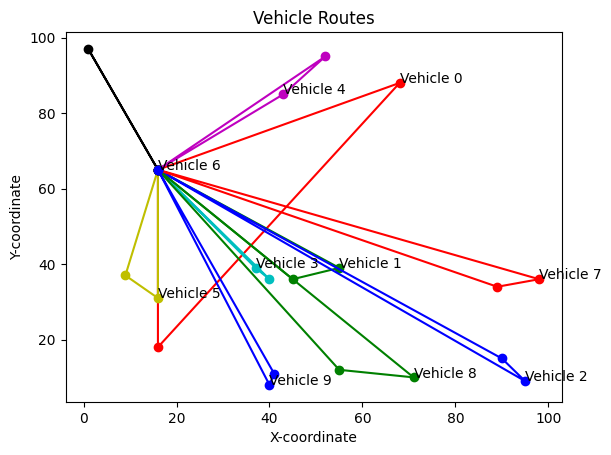

In [ ]:
# Create empty lists for each vehicle's route
routes = [[] for i in range(num_vehicles)]

# Assign customers to vehicles in the best solution found
for i in range(num_customers):
    vehicle = int(solution[i])
    if vehicle >= num_vehicles:
        continue # Skip this customer if the vehicle index is out of range
    routes[vehicle].append(i+1)

# Plot the routes of each vehicle
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'] # Add more colors as needed
for i in range(num_vehicles):
    x = [locations[depot, 0]] + [locations[j-1, 0] for j in routes[i]] + [locations[depot, 0]]
    y = [locations[depot, 1]] + [locations[j-1, 1] for j in routes[i]] + [locations[depot, 1]]
    plt.plot(x, y, marker='o', color=colors[i%len(colors)])
    plt.annotate(f"Vehicle {i}", (x[1], y[1]))

plt.title("Vehicle Routes")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.show()

This part is for printing solutions and plots

In [ ]:
# Get the best solution found
solution, solution_fitness, solution_idx = ga.best_solution()

# Print the best solution and its cost
# In Best Solution for example when there is [0. 1. 1.] the number 1. or 0. are vehicles so vehicle0 and vehicle1 in this example and there are 3 clients
# So when there is 0. it means that vehicle0 arrived for client1 and when there is 1 it means that vehicle1 arrived for client2 so on ...
print("Best solution: ", solution) 
print("Fitness value: ", solution_fitness)

# Get the best fitness values over generations
best_fitness = ga.best_solutions_fitness

# Plot the fitness values
plt.plot(best_fitness)
plt.title("Best Fitness per Generation")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.show()

Implementation for this problem using Particle Swarm Optimizer using the same fitness function

2023-04-12 21:16:17,505 - pyswarms.single.global_best - INFO - Optimize for 150 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|150/150, best_cost=0.0317
2023-04-12 21:16:17,855 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.03165420510128113, best pos: [3.85305115 3.76741796 2.74078294 2.21494212 2.59925264 3.16721443
 1.84105862 1.49363163 3.65320646 2.83925688]


Best solution:  [3 3 2 2 2 3 1 1 3 2]
Fitness value:  31.591379306489912


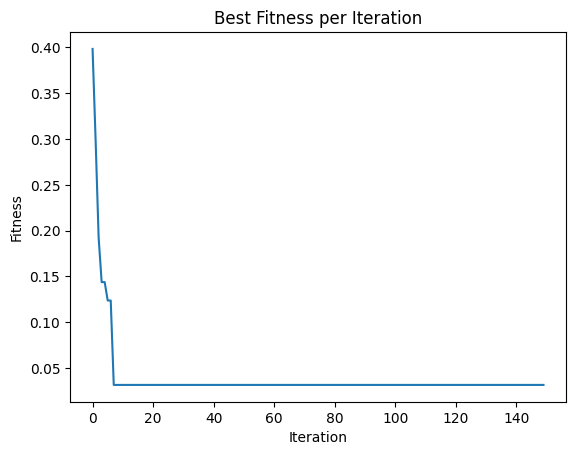

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyswarms.single.global_best import GlobalBestPSO

num_vehicles = 4
num_customers = 10
depot = 0
locations = np.random.randint(1, 10, size=(num_customers, 2))

# Define the distances between each customer and the depot
distances = np.zeros((num_customers+1, num_customers+1))
for i in range(num_customers):
    for j in range(i+1, num_customers):
        distances[i+1,j+1] = np.linalg.norm(locations[i,:] - locations[j,:])
        distances[j+1,i+1] = distances[i+1,j+1]

# Define the fitness function
def fitness_function(positions):
    # Assign customers to vehicles
    routes = [[] for i in range(num_vehicles)]
    for i in range(num_customers):
        vehicle = int(positions[i][0])
        if vehicle >= num_vehicles:
            continue # Skip this customer if the vehicle index is out of range
        routes[int(vehicle)].append(i+1)
    # Calculate the fitness value of the solution
    fitness = 0
    for r in routes:
        if len(r) > 0:
            # Calculate the distance traveled by the vehicle
            route_distance = distances[depot, r[0]] + sum([distances[r[i-1], r[i]] for i in range(1, len(r))]) + distances[r[-1], depot]
            if route_distance > 0:
                # Add the inverse of the route distance to the fitness value
                fitness += 1/route_distance
    return fitness

# Define the bounds for the positions
bounds = (np.zeros(num_customers), (num_vehicles)*np.ones(num_customers))

# Create the optimizer
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=30, dimensions=num_customers, options=options, bounds=bounds)

# Run the optimization
cost, pos = optimizer.optimize(fitness_function, iters=150)

# Get the best solution found
solution = pos.astype(int)
solution_fitness = 1/cost

# Print the best solution and its cost
print("Best solution: ", solution) 
print("Fitness value: ", solution_fitness)

# Get the best fitness values over iterations
best_fitness = optimizer.cost_history

# Plot the fitness values
plt.plot(best_fitness)
plt.title("Best Fitness per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.show()